In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# load data
test_data = pd.read_csv('test.csv')

In [2]:
Scores = test_data[['Xgboost_Positive_Probability','Anomaly_Score']]

In [3]:
prob = StandardScaler().fit_transform(Scores)

In [4]:
prob

array([[-0.77799542, -1.23338506],
       [-0.50997812,  0.03454505],
       [-0.6748039 ,  1.28220471],
       ...,
       [ 0.07722646, -0.12766753],
       [ 2.19677627,  0.5491581 ],
       [ 0.01562608, -1.56691796]])

In [5]:
y = (8 * prob[:,0] + 2 * prob[:,1]) / 2
y

array([-4.34536675, -2.00536744, -1.4170109 , ...,  0.18123829,
        9.33626319, -1.50441363])

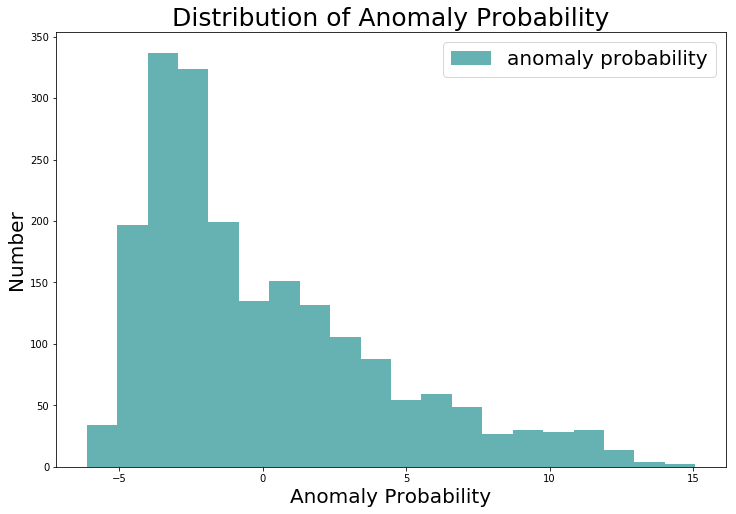

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
plt.hist(y, bins=20, label="anomaly probability", color ='Teal', alpha = 0.6)
plt.title("Distribution of Anomaly Probability", fontsize= 25)
plt.xlabel('Anomaly Probability', fontsize = 20)
plt.ylabel('Number', fontsize = 20)
plt.legend(prop ={'size':20})
#plt.savefig('Anomaly_Score.png')
plt.show()

In [7]:
y = pd.DataFrame(y)

In [8]:
y_prob = MinMaxScaler().fit_transform(y)

In [9]:
y_prob = pd.DataFrame(y_prob)
y_prob.head(10)

,0
0,0.084610
1,0.194842
2,0.222559
3,0.158976
4,0.095776
5,0.414286
6,0.105208
7,0.316172
8,0.196540
9,0.400462


In [10]:
y_prob_values = y_prob.values
y_prob_values

array([[0.08461001],
       [0.19484237],
       [0.22255859],
       ...,
       [0.29784869],
       [0.72912231],
       [0.21844123]])

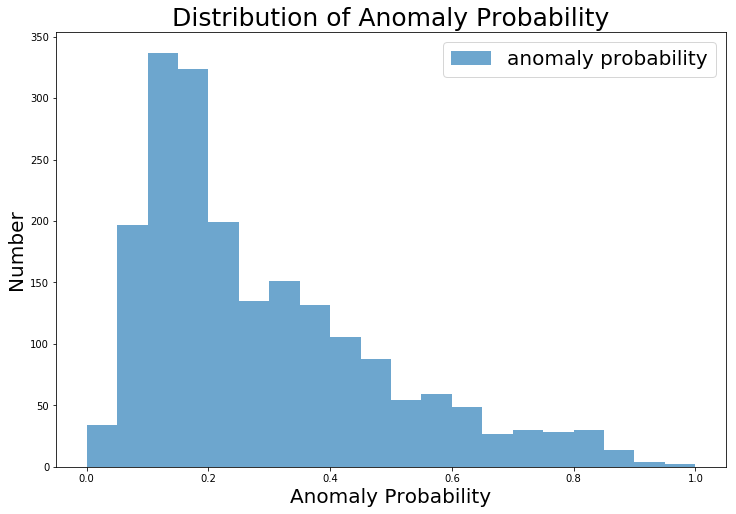

In [11]:
plt.figure(figsize=(12,8))
plt.hist(y_prob_values, bins = 20, label = 'anomaly probability', alpha = 0.65)
plt.title('Distribution of Anomaly Probability', fontsize =25)
plt.xlabel('Anomaly Probability', fontsize=20)
plt.ylabel('Number', fontsize=20)
plt.legend(prop = {"size":20})
plt.show()

In [12]:
Scores = pd.concat([Scores, y_prob], axis=1)
Scores.rename(columns={0:'Final Probability'}, inplace = True)

In [13]:
Scores.head(10)

,Xgboost_Positive_Probability,Anomaly_Score,Final Probability
0,0.144343,0.460714,0.084610
1,0.196064,0.477539,0.194842
2,0.164257,0.494096,0.222559
3,0.169093,0.474854,0.158976
4,0.135958,0.466166,0.095776
5,0.325491,0.503755,0.414286
6,0.149831,0.465006,0.105208
7,0.307535,0.481056,0.316172
8,0.185316,0.480974,0.196540
9,0.333491,0.497660,0.400462


In [14]:
Scores.to_csv("Final Probability.csv")